In [1]:
import re 
import nltk 
import string 
import numpy as np
import pandas as pd
import multiprocessing
from datetime import datetime
from collections import Counter
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from nltk.stem.porter import *
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
plt.style.use('seaborn-white')
orange, purple, elm ='#FFCC00', '#666599', '#217C7E'
blue, red, grey, green ='#336699', '#9A3334', '#AAAAAA', '#335333'
np.random.seed(2018)
%matplotlib inline
mydpi=600
s=18

__author__ = 'HK Dambanemuya'
__version__ = 'Python3'

In [4]:
print ("Reading News...")
news = pd.read_csv("../../Data/Fusion/news.csv")
news = news[news['length']>100]
news['date'] = [datetime.strftime(pd.to_datetime(date), '%Y-%m-%d') for date in tqdm_notebook(news['date'])]

print ("Reading Blogs...")
blogs = pd.read_csv("../../Data/Fusion/blogs.csv")
blogs = blogs[blogs['length']>100]
blogs['date'] = [datetime.strftime(pd.to_datetime(date), '%Y-%m-%d') for date in tqdm_notebook(blogs['date'])]

print ("Reading Discussions...")
discussions = pd.read_csv("../../Data/Fusion/discussions.csv")
discussions = discussions[discussions['length']>100]
discussions['date'] = [datetime.strftime(pd.to_datetime(date), '%Y-%m-%d') for date in tqdm_notebook(discussions['date'])]

Reading News...



Reading Blogs...



Reading Discussions...


In [5]:
# Select countries common in all 3 data sets
country_map = Counter(set(news['country']))+Counter(set(blogs['country']))+ Counter(set(discussions['country']))
common_locations = []
for k,v in tqdm_notebook(country_map.items()):
    if (v == 3) and (k==k):
        common_locations.append(k)
print("Common Countries:", len(common_locations))


Common Countries: 79


In [6]:
# Filter data by common countries
news = news[news['country'].isin(common_locations)]
blogs = blogs[blogs['country'].isin(common_locations)]
discussions = discussions[discussions['country'].isin(common_locations)]
print ("News:", len(news))
print ("Blogs:", len(blogs))
print ("Discussions:", len(discussions))

News: 2277563
Blogs: 946755
Discussions: 409091


In [7]:
# Popularity
popularity_n = pd.DataFrame.from_dict(Counter(news['participants']), orient='index', columns=['Frequency'])
popularity_b = pd.DataFrame.from_dict(Counter(blogs['participants']), orient='index', columns=['Frequency'])
popularity_d = pd.DataFrame.from_dict(Counter(discussions['participants']), orient='index', columns=['Frequency'])
# Engagement
engagement_n = pd.DataFrame.from_dict(Counter(news['replies']), orient='index', columns=['Frequency'])
engagement_b = pd.DataFrame.from_dict(Counter(blogs['replies']), orient='index', columns=['Frequency'])
engagement_d = pd.DataFrame.from_dict(Counter(discussions['replies']), orient='index', columns=['Frequency'])

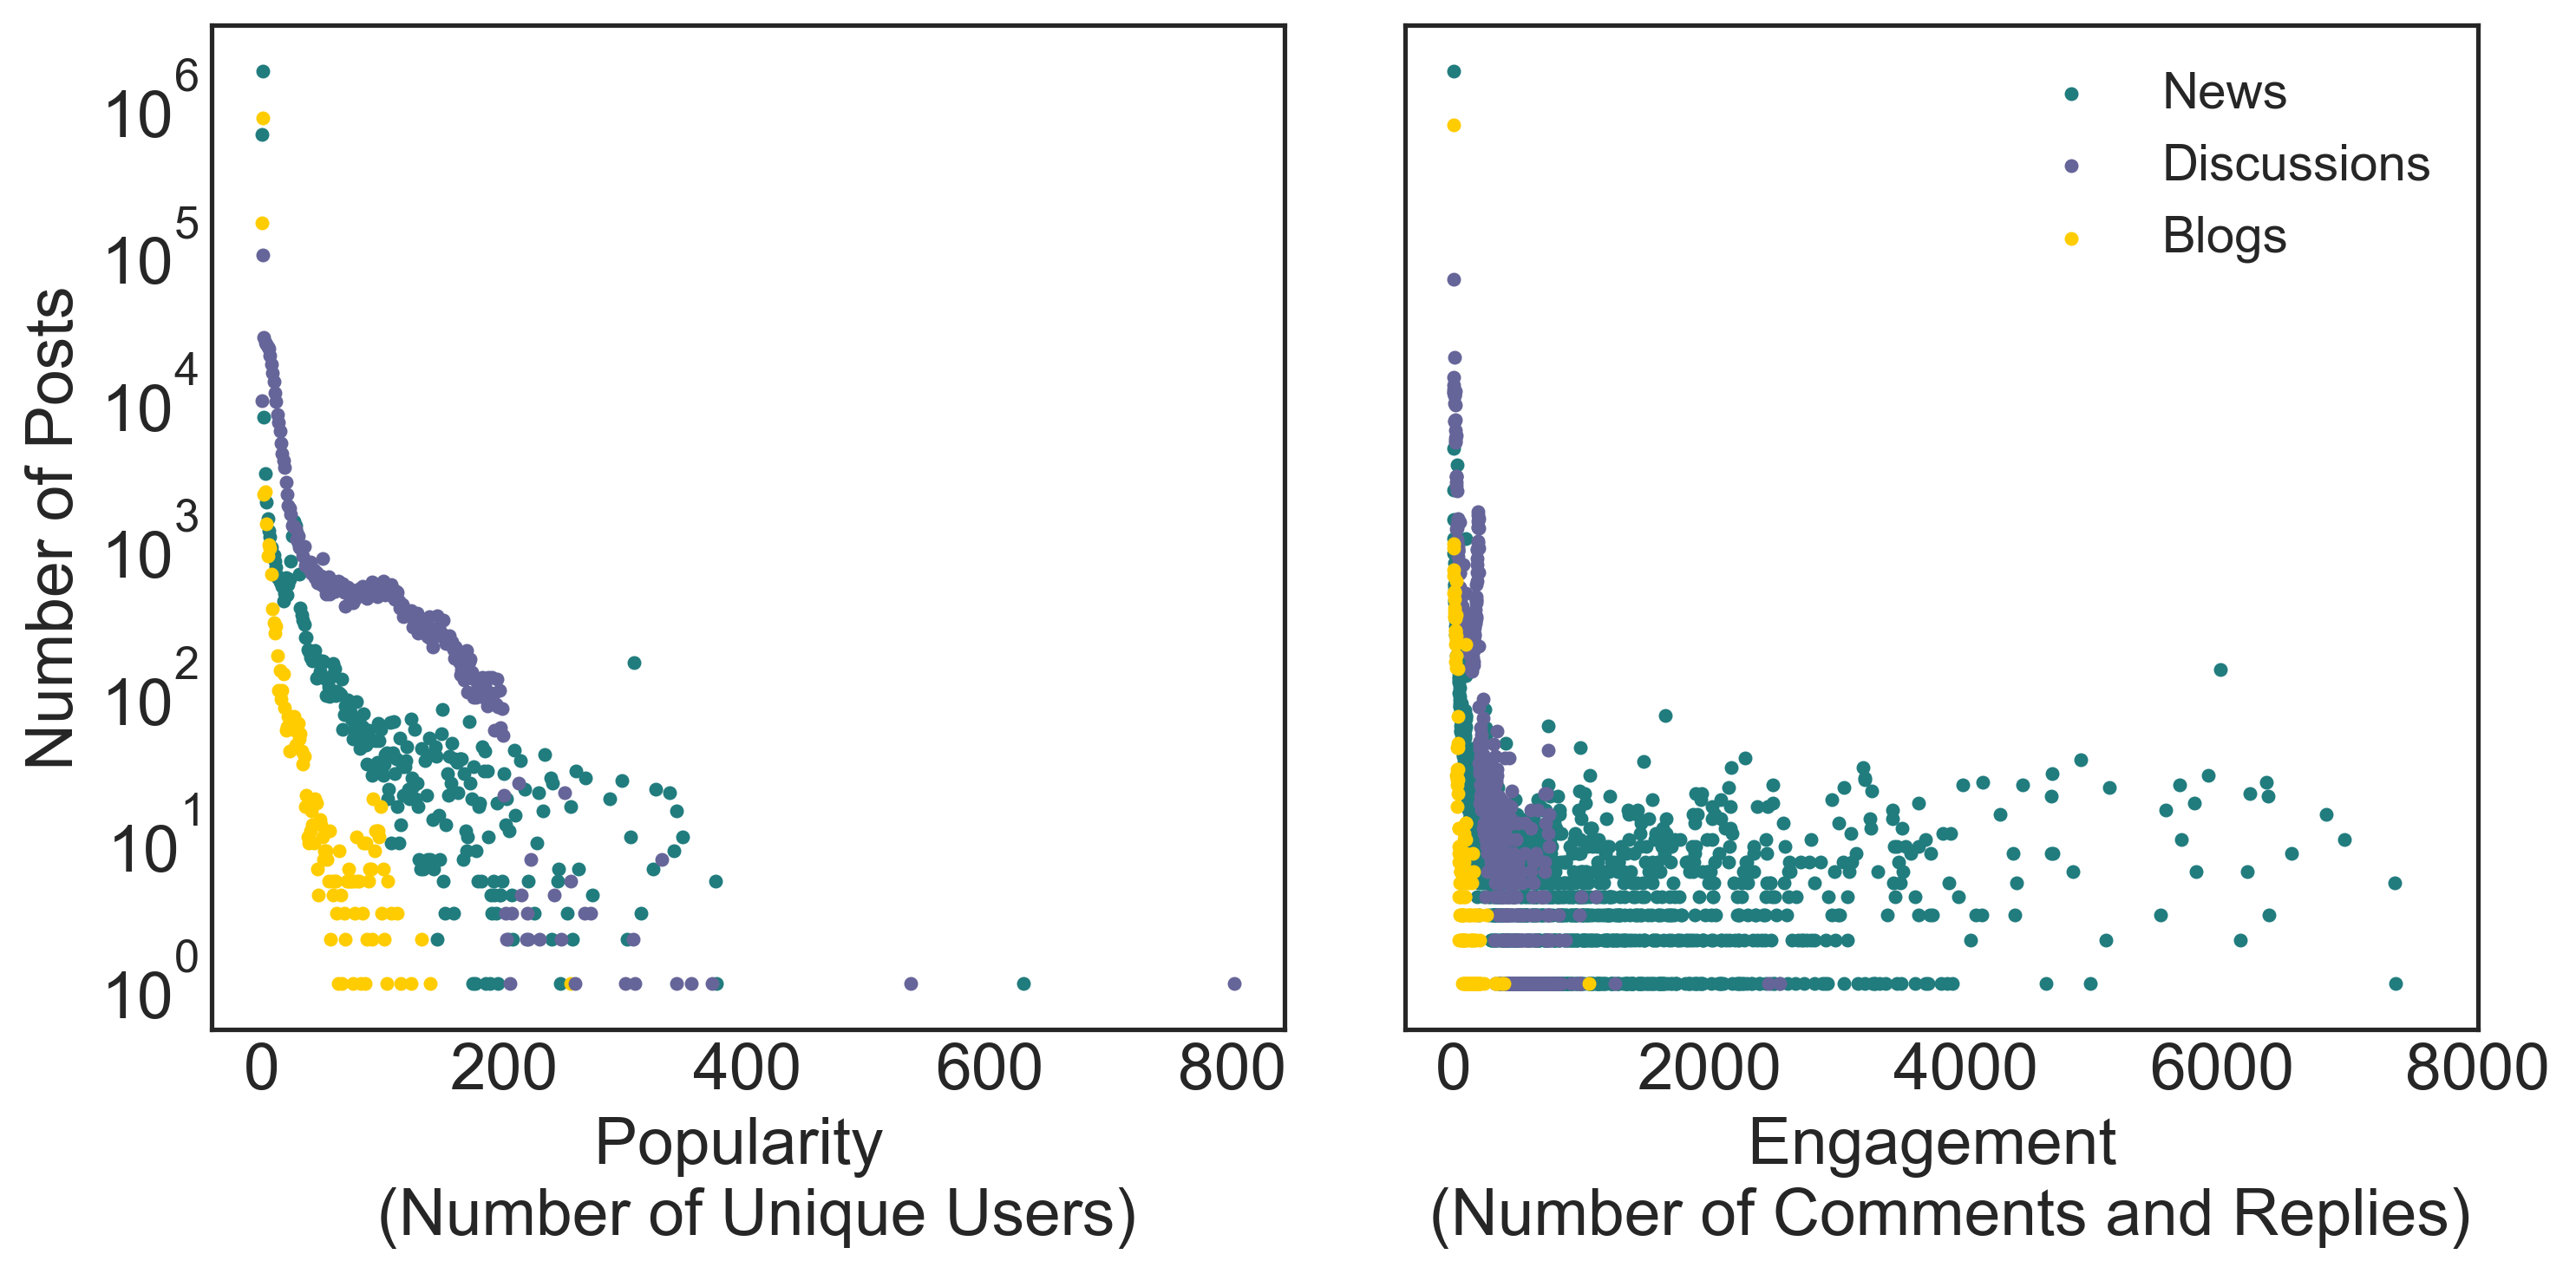

In [8]:
fig = plt.figure(figsize=(10,5), dpi=300)

ax = plt.subplot(1, 2, 1)
plt.scatter(popularity_n.index.values, popularity_n['Frequency'], label='News', color=elm, s=8)
plt.scatter(popularity_b.index.values, popularity_b['Frequency'], label='Blogs', color=orange, s=8)
plt.scatter(popularity_d.index.values, popularity_d['Frequency'], label='Discussions', color=purple, s=8)
plt.xticks(np.arange(0,max(popularity_n.index.values)+200, 200), fontsize=s)
plt.yticks(fontsize=s)
plt.yscale('log')
plt.xlabel('Popularity \n (Number of Unique Users)', fontsize=s)
plt.ylabel('Number of Posts', fontsize=s)

ax = plt.subplot(1, 2, 2)
plt.scatter(engagement_n.index.values, engagement_n['Frequency'], label='News', color=elm, s=8)

plt.scatter(engagement_d.index.values, engagement_d['Frequency'], label='Discussions', color=purple, s=8)
plt.scatter(engagement_b.index.values, engagement_b['Frequency'], label='Blogs', color=orange, s=8)
plt.xticks(np.arange(0,max(engagement_n.index.values)+2e3, 2e3), fontsize=s)
plt.yscale('log')
plt.yticks([])
plt.xlabel('Engagement \n (Number of Comments and Replies)', fontsize=s)
plt.legend(loc='best', fontsize=s-4)

plt.tight_layout()
plt.show()